# **SSC0957 - Prática em Ciência de Dados II**
---

### **Alunos:**
> #### Arthur Santorum Lorenzetto - 12559465
> #### André Guarnier De Mitri    - 11395579
> #### Rui Emanuel Lima Vieira    - 11819182

### **Professor:** Alexandre Claudio Botazzo Delbem
---

# Importação de Bibliotecas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import seaborn as sns
import scikit_posthocs as sp
from scipy import stats

In [2]:
# Carregando dados

# Testes Estatísticos
## Todos resultados aqui apresentados derivam do notebook testes_estatisticos.ipynb

In [3]:
df = pd.read_parquet('Dados/obitos_raca_cor.parquet', engine='pyarrow')

# Definindo o dataframe das pessoas sem comorbidade
condicao_sem_comorbidade = (
    ((df['asma'].isna() == True) | (df['asma'] == None)) &
    ((df['cardiopatia'].isna() == True) | (df['cardiopatia'] == None)) &
    ((df['diabetes'].isna() == True) | (df['diabetes'] == None)) &
    ((df['doenca_hematologica'].isna() == True) | (df['doenca_hematologica'] == None)) &
    ((df['doenca_hepatica'].isna() == True) | (df['doenca_hepatica'] == None)) &
    ((df['doenca_neurologica'].isna() == True) | (df['doenca_neurologica'] == None)) &
    ((df['doenca_renal'].isna() == True) | (df['doenca_renal'] == None)) &
    ((df['imunodepressao'].isna() == True) | (df['imunodepressao'] == None)) &
    ((df['obesidade'].isna() == True) | (df['obesidade'] == None)) &
    ((df['pneumopatia'].isna() == True) | (df['pneumopatia'] == None)) &
    ((df['puerpera'].isna() == True) | (df['puerpera'] == None)) &
    ((df['sindrome_de_down'].isna() == True) | (df['sindrome_de_down'] == None))
)
df_sem_comorbidade = df[condicao_sem_comorbidade]

# Definindo o dataframe das pessoas com comorbidade
condicao_comorbidade = (
    ((df['asma'].isna() == False) | (df['asma'] != None)) |
    ((df['cardiopatia'].isna() == False) | (df['cardiopatia'] != None)) |
    ((df['diabetes'].isna() == False) | (df['diabetes'] != None)) |
    ((df['doenca_hematologica'].isna() == False) | (df['doenca_hematologica'] != None)) |
    ((df['doenca_hepatica'].isna() == False) | (df['doenca_hepatica'] != None)) |
    ((df['doenca_neurologica'].isna() == False) | (df['doenca_neurologica'] != None)) |
    ((df['doenca_renal'].isna() == False) | (df['doenca_renal'] != None)) |
    ((df['imunodepressao'].isna() == False) | (df['imunodepressao'] != None)) |
    ((df['obesidade'].isna() == False) | (df['obesidade'] != None)) |
    ((df['pneumopatia'].isna() == False) | (df['pneumopatia'] != None)) |
    ((df['puerpera'].isna() == False) | (df['puerpera'] != None)) |
    ((df['sindrome_de_down'].isna() == False) | (df['sindrome_de_down'] != None))
)

df_com_comorbidade = df[condicao_comorbidade]

df.head(2)

,codigo_ibge,nome_munic,nome_drs,obito,raca_cor,idade,cs_sexo,asma,cardiopatia,diabetes,doenca_hematologica,doenca_hepatica,doenca_neurologica,doenca_renal,imunodepressao,obesidade,pneumopatia,puerpera,sindrome_de_down
0,3500303.0,Aguaí,São João da Boa Vista,False,None,41.0,feminino,NaN,9.0,9.0,NaN,NaN,NaN,9.0,9.0,NaN,NaN,NaN,NaN
1,3555000.0,Tupã,Marília,False,PARDA,31.0,feminino,NaN,9.0,9.0,NaN,NaN,NaN,9.0,9.0,NaN,NaN,NaN,NaN


## Para as distribuições das idades

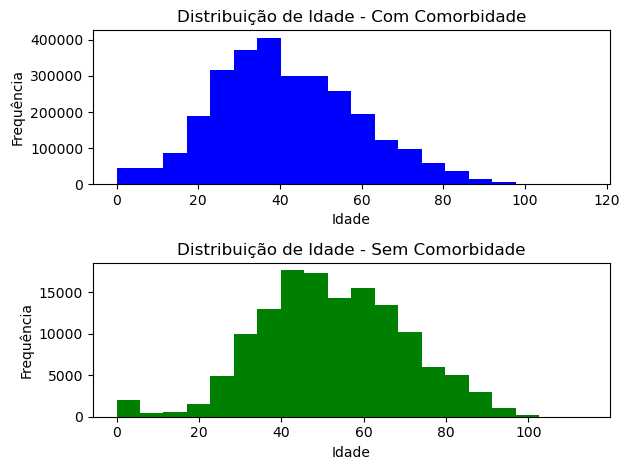

In [4]:
# Subplot para df_com_comorbidade
plt.subplot(2, 1, 1)  # 2 linhas, 1 coluna, plot 1
plt.hist(df_com_comorbidade['idade'], bins=20, color='blue')
plt.title('Distribuição de Idade - Com Comorbidade')
plt.xlabel('Idade')
plt.ylabel('Frequência')

# Subplot para df_sem_comorbidade
plt.subplot(2, 1, 2)  # 2 linhas, 1 coluna, plot 2
plt.hist(df_sem_comorbidade['idade'], bins=20, color='green')
plt.title('Distribuição de Idade - Sem Comorbidade')
plt.xlabel('Idade')
plt.ylabel('Frequência')

# Ajuste de layout para evitar sobreposição
plt.tight_layout()

# Exibição dos plots
plt.show()

### Testando a Normalidade (Shapiro Wilk)
 > H0: A distribuição seguem uma distribuição normal
> 
 > H1: A distribuição NÃO seguem uma distribuição normal

In [5]:
# Teste de Shapiro-Wilk
def check_normality(data):
    test_stat_normality, p_value_normality=stats.shapiro(data)
    print("p value:%.4f" % p_value_normality)
    if p_value_normality < 0.05:
        print("Rejeito H0 ---> Dados não possuem distribuição normal")
    else:
        print("Não Rejeito H0 ---> Dados possuem distribuição normal")

In [6]:
check_normality(df_sem_comorbidade['idade'])
check_normality(df_com_comorbidade['idade'])

p value:1.0000
Não Rejeito H0 ---> Dados possuem distribuição normal
p value:1.0000
Não Rejeito H0 ---> Dados possuem distribuição normal


/home/andre/anaconda3/lib/python3.11/site-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


**Observação:**

  >A idade de pessoas **SEM comorbidade** segue uma distribuição **Normal**
>
  >A idade de pessoas **COM comorbidade** segue uma distribuição **Normal**

---
---

## Teste para média da Idade (Mann–Whitney)

Para as média da **idade** das pessoas **COM comorbidade** ($\mu_1$) e média da idade das pessoas **SEM comorbidade** ($\mu_2$)

H0: $\mu_1 = \mu_2$, A média é igual para COM e SEM comorbidade

H1: $\mu_1 \neq \mu_2$, A média é diferente para COM e SEM comorbidade

In [7]:
def test_media(data1, data2):
    ttest,p_value = stats.mannwhitneyu(data1.dropna(), data1.dropna(), alternative="two-sided")
    #print(data1.dropna().mean(), data2.dropna().mean())
    print("p value:%.8f" % p_value)
    if p_value < 0.05:
        print("Rejeita H0")
    else:
        print("Não rejeita H0")

In [8]:
test_media(df_sem_comorbidade['idade'], df_com_comorbidade['idade'])

p value:1.00000000
Não rejeita H0


**Observação:**
  
A **idade** de pessoas SEM comorbidade e COM comorbidade **tem a mesma média** para 95% de significancia

---
---

### Teste para Variância da idade (Levene’s test)

Para as variâncias da **idade** das pessoas **COM comorbidade** ($\sigma_1$) e variância da idade das pessoas **SEM comorbidade** ($\sigma_2$)

H0: $\sigma_1 = \sigma_2$, A variância é **igual** para COM comorbidade e SEM comorbidade

H1: $\sigma_1 \neq \sigma_2$, A variância é **diferente** para COM comorbidadee SEM comorbidade

In [9]:
# Levene’s test
def check_variance_homogeneity(data1, data2):
    test_stat_var, p_value_var= stats.levene(data1.dropna(),data2.dropna())
    print("p value:%.4f" % p_value_var)
    if p_value_var < 0.05:
        print("Rejeita H0")
    else:
        print("Não rejeita H0")

In [10]:
check_variance_homogeneity(df_sem_comorbidade['idade'], df_com_comorbidade['idade'])

p value:0.0000
Rejeita H0


**Observação:**
  
A **variância da idade** de pessoas COM comorbidade é **DIFERENTE** das pessoas SEM comorbidade

---
---

## Teste para dependencia de caracteristicas (Qui Quadrado), para medir influência da comorbidade no óbito


H0: A variavel (A) é **INDEPENDENTE** da variável (B)

H1: A variavel (A) é **DEPENDENTE** da variável (B)

In [11]:
import pandas as pd
from scipy.stats import chi2_contingency

# Comorbidades
df_subset = df_com_comorbidade[['obito', 'asma', 'cardiopatia', 'diabetes', 'doenca_hematologica',
                                'doenca_hepatica', 'doenca_neurologica', 'doenca_renal',
                                'imunodepressao', 'obesidade', 'pneumopatia', 'puerpera', 'sindrome_de_down']]

df_subset = df_subset.fillna(0) # Substitua os valores NaN por 0
results = []

# Para cada comorbidade
for comorbidade in df_subset.columns[1:]:
    # Tabela contigencia
    contingency_table = pd.crosstab(df_subset['obito'], df_subset[comorbidade])

    # Test qui-quadrado
    chi2, p, _, _ = chi2_contingency(contingency_table)

    # Resultado
    results.append({'Comorbidade': comorbidade, 'Chi2': chi2, 'P-value': p})

# Resultado
results_df = pd.DataFrame(results).sort_values(by='Chi2', ascending=False).reset_index(drop=True)
results_df

,Comorbidade,Chi2,P-value
0,doenca_renal,737352.849560,0.0
1,imunodepressao,731057.913355,0.0
2,diabetes,594872.328419,0.0
3,cardiopatia,521211.073742,0.0
4,doenca_neurologica,480225.044594,0.0
5,pneumopatia,468470.396507,0.0
6,obesidade,463607.034943,0.0
7,doenca_hepatica,449854.016269,0.0
8,doenca_hematologica,448379.264459,0.0
9,asma,447083.779511,0.0


Os resultados indicam que, para cada uma das comorbidades listadas, o teste qui-quadrado de independência gerou um valor muito alto para a estatística qui-quadrado um valor-p extremamente baixo (próximo a zero). Isso sugere fortemente a rejeição da hipótese nula de independência entre a presença da comorbidade e a variável de óbito.

Em termos práticos, isso significa que há uma associação significativa entre cada uma das comorbidades (asma, cardiopatia, diabetes, doença hematológica, doença hepática, doença neurológica, doença renal, imunodepressão, obesidade, pneumopatia, puerpera, síndrome de Down) e a ocorrência de óbito. O valor-p próximo de zero sugere que a probabilidade de os resultados observados ocorrerem por acaso, assumindo independência, é muito baixa.

**Importante:** O resultado está ordenado por maior estatísitca Qui-Quadrado, indicando que a característica possuí maior influência no óbito. Obtemos que **Doença Renal e Imunodepressão são os que mais levam ao óbito.**


---
---
## Influência da idade no Óbito (Teste T)


A média da idade das pessoas que TIVERAM obito ($\mu_1$) e a média das pessoas que NÃO tiveram óbito ($\mu_2$)

H0: $\mu_1 = \mu_2$, A média é igual para COM e SEM óbito

H1: $\mu_1 \neq \mu_2$, A média é diferente para COM e SEM óbito

In [12]:
from scipy.stats import ttest_ind

# Subconjunto de dados relevantes
df_subset_idade = df_com_comorbidade[['obito', 'idade']].dropna()

# Divida os dados em dois grupos: óbito e não óbito
grupo_obito = df_subset_idade[df_subset_idade['obito'] == True]['idade']
grupo_nao_obito = df_subset_idade[df_subset_idade['obito'] == False]['idade']

# Realize o teste t de Student
t_statistic, p_value = ttest_ind(grupo_obito, grupo_nao_obito)

# Exiba os resultados
print(f"T-Statistic: {t_statistic}")
print(f"P-Value: {p_value}")

# Interprete os resultados
alpha = 0.05
if p_value < alpha:
    print("Rejeita H0, a idade tem infuência")
else:
    print("Não há evidências suficientes para rejeitar a hipótese nula. A idade pode não ser significativamente diferente entre os grupos.")


T-Statistic: 483.0209275172298
P-Value: 0.0
Rejeita H0, a idade tem infuência


**Obervação:**

Como resultado, temos que a **idade têm influência no  váriavel óbito** para pessoas com comorbidade

## Piramides Etárias

### Funções

In [13]:
import time

def gera_piramide_etaria(data, comorbidade):
    # Contagem de idades por faixa etária e gênero de PARTE DOS DADOS
    contagem_idade_homens = (data.loc[data['cs_sexo'] == 'masculino', 'idade'] // 5).value_counts().sort_index(ascending=False)
    contagem_idade_mulheres = (data.loc[data['cs_sexo'] == 'feminino', 'idade'] // 5).value_counts().sort_index(ascending=False)

    # Valores Máximos
    max_len = max(len(contagem_idade_homens), len(contagem_idade_mulheres))
    contagem_idade_homens = contagem_idade_homens.reindex(range(max_len), fill_value=0)
    contagem_idade_mulheres = contagem_idade_mulheres.reindex(range(max_len), fill_value=0)

    # Calcular porcentagem em relação à população total de homens e mulheres
    total_pop = len(df)

    percentagem_idade_homens = (contagem_idade_homens / total_pop) * 100
    percentagem_idade_mulheres = (contagem_idade_mulheres / total_pop) * 100

    # Criar faixas etárias
    faixas_etarias = np.flip([str(i*5) + '-' + str((i+1)*5-1) for i in range(max_len)])

    # Plotar a pirâmide etária
    fig, ax = plt.subplots()

    # Homens à esquerda
    ax.barh(faixas_etarias, percentagem_idade_homens, color='blue', label='Homens')

    # Mulheres à direita
    ax.barh(faixas_etarias, [-x for x in percentagem_idade_mulheres], color='orange', label='Mulheres')

    # Ajustes estéticos
    ax.set_xlabel('Porcentagem da População (%)')
    ax.set_ylabel('Faixa Etária')
    ax.set_title(f"Pirâmide Etária - {comorbidade}")
    ax.legend()
    max_value = max(percentagem_idade_homens.max(), percentagem_idade_mulheres.max())
    ax.set_xlim(-max_value, max_value)

    # Inverter eixo y para ter a faixa etária mais jovem na parte inferior
    ax.invert_yaxis()

    # Mostrar quanto é 100% da população total
    total_com_condicao = contagem_idade_mulheres.sum() + contagem_idade_homens.sum()
    print(f"100% da população: {total_pop} --- Pessoas com essa condição {total_com_condicao} ({total_com_condicao/total_pop:.6f}%)")

    # Salvando imagem
    plt.savefig(f'imagens/img_{comorbidade}.png')

    # Mostrando img
    plt.show()

from scipy.stats import ttest_ind

def compara_genero(data):
    # Lista para armazenar os resultados dos testes para cada faixa etária
    resultados = []

    # Loop pelas faixas etárias de 5 em 5 anos
    for i in range(0, 100, 5):  # Ajuste o intervalo conforme sua faixa de idades
        # Subconjunto de dados relevantes para a faixa etária atual
        subset = data[(data['idade'] >= i) & (data['idade'] < i + 5)]

        # Divida os dados em dois grupos: masculino e feminino
        grupo1 = subset[subset['cs_sexo'] == 'masculino']['idade']
        grupo2 = subset[subset['cs_sexo'] == 'feminino']['idade']

        # Realize o teste t de Student se houver dados suficientes
        if len(grupo1) > 1 and len(grupo2) > 1:
            t_statistic, p_value = ttest_ind(grupo1, grupo2)
            resultados.append({'Faixa Etária': f'{i}-{i+4}', 'T-Statistic': t_statistic, 'P-Value': p_value})
        else:
            resultados.append({'Faixa Etária': f'{i}-{i+4}', 'T-Statistic': None, 'P-Value': None})

    # Exiba os resultados
    for resultado in resultados:
        print(f"Faixa Etária: {resultado['Faixa Etária']}")
        if resultado['T-Statistic'] is not None and resultado['P-Value'] is not None:
            print(f"T-Statistic: {resultado['T-Statistic']}")
            print(f"P-Value: {resultado['P-Value']}")
            alpha = 0.05
            if resultado['P-Value'] < alpha:
                print("ACEITA hipotese nula: não há diferença significativa da média de idade entre gêneros.")
            else:
                print("REJEITA hipótese nula: pode haver diferença significativa da média de idade entre gêneros.")
        else:
            print("Não há dados suficientes para realizar o teste t de Student.")
        print("")

In [14]:
import matplotlib.pyplot as plt
import os

def show_multiplot(condition, images_folder='imagens', images_per_condition=6):
    # Get a list of all image files in the specified folder
    image_files = [f for f in os.listdir(images_folder) if f.endswith(".png")]

    # Filter image files based on the specified condition
    condition_files = [image_file for image_file in image_files if condition in image_file]

    # Check if there are images for the specified condition
    if not condition_files:
        print(f"No images found for the condition: {condition}")
        return

    # Sort condition_files based on the numbers at the beginning of each filename
    condition_files.sort(key=lambda x: int(x.split(' - ')[0]))

    # Set up the multiplot grid
    num_rows = 3
    num_cols = 2
    fig, axs = plt.subplots(num_rows, num_cols, figsize=(10, 12))
    fig.suptitle(f"Pirames Etárias: {condition}", fontsize=16)

    # Iterate through images to display them in the multiplot
    for i in range(num_rows):
        for j in range(num_cols):
            index = i * num_cols + j
            if index < len(condition_files) and index < images_per_condition:
                image_file = condition_files[index]
                img_path = os.path.join(images_folder, image_file)
                img = plt.imread(img_path)
                axs[i, j].imshow(img)
                axs[i, j].axis('off')

                # Remove the file extension correctly
                file_name, _ = os.path.splitext(image_file)
                axs[i, j].set_title(file_name)
            else:
                # If index exceeds available images, remove the subplot
                axs[i, j].axis('off')

    # Adjust layout for better spacing
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()

### Piramides Etárias Plots

#### Doença Renal

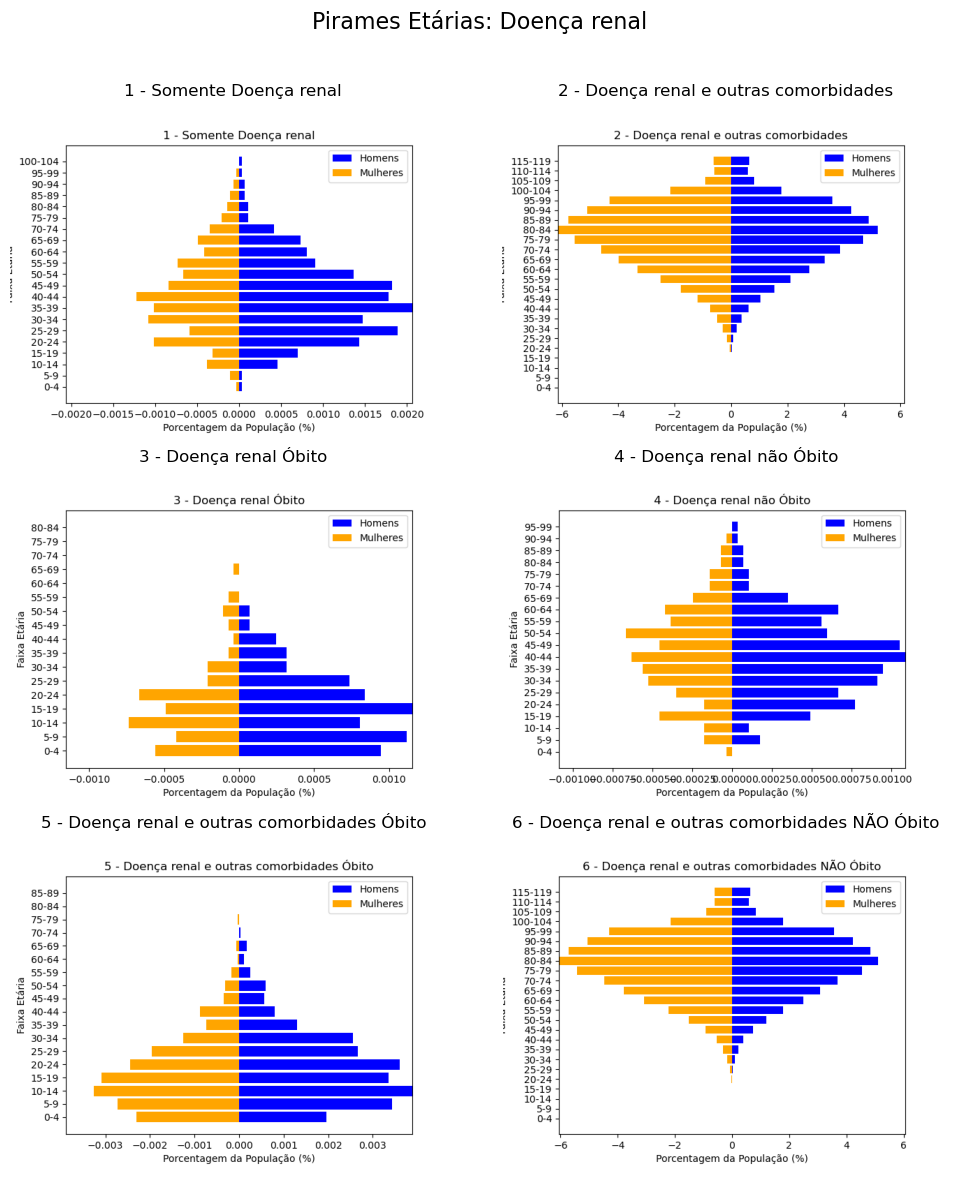

In [18]:
show_multiplot('Doença renal')

#### Imunodepressão

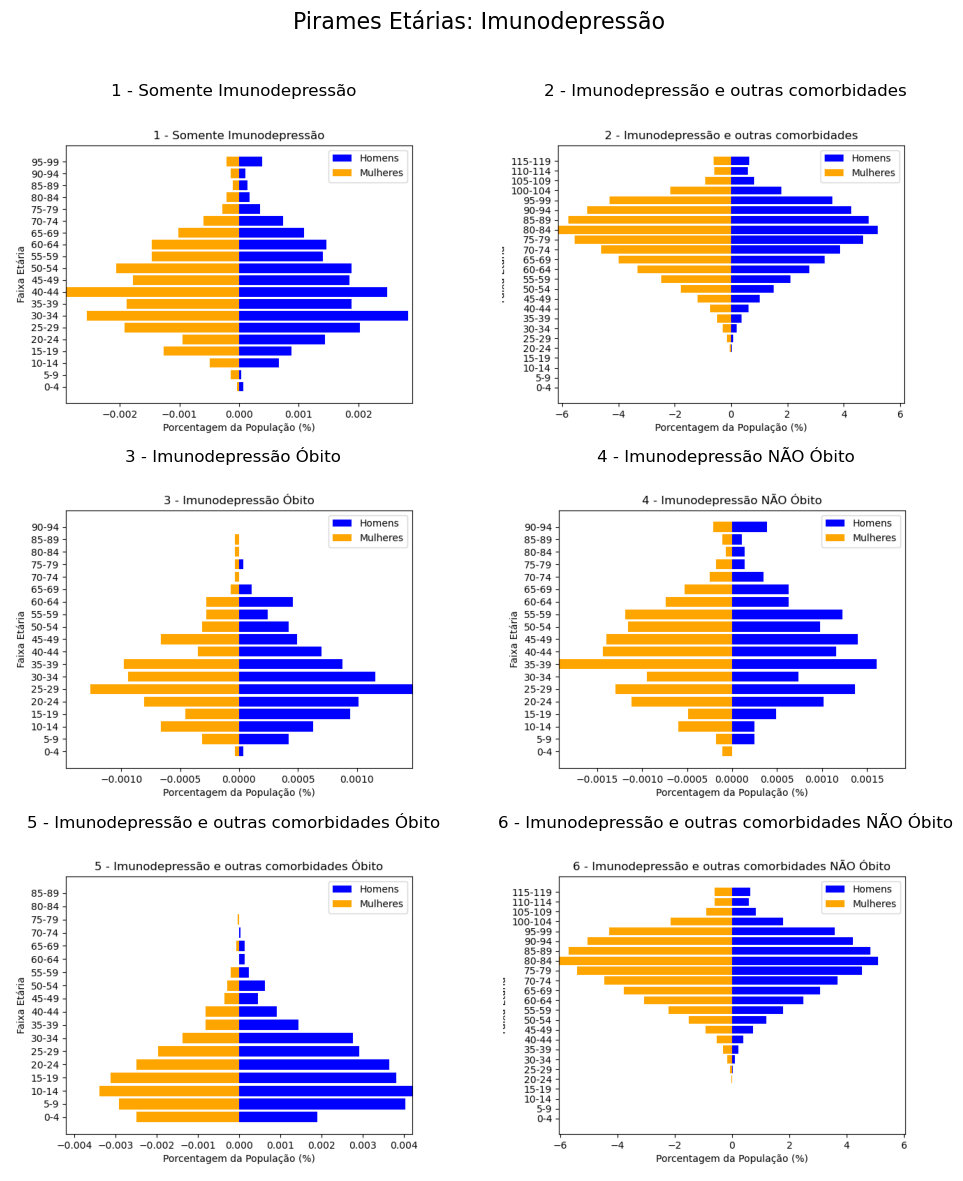

In [19]:
show_multiplot('Imunodepressão')

#### Diabetes

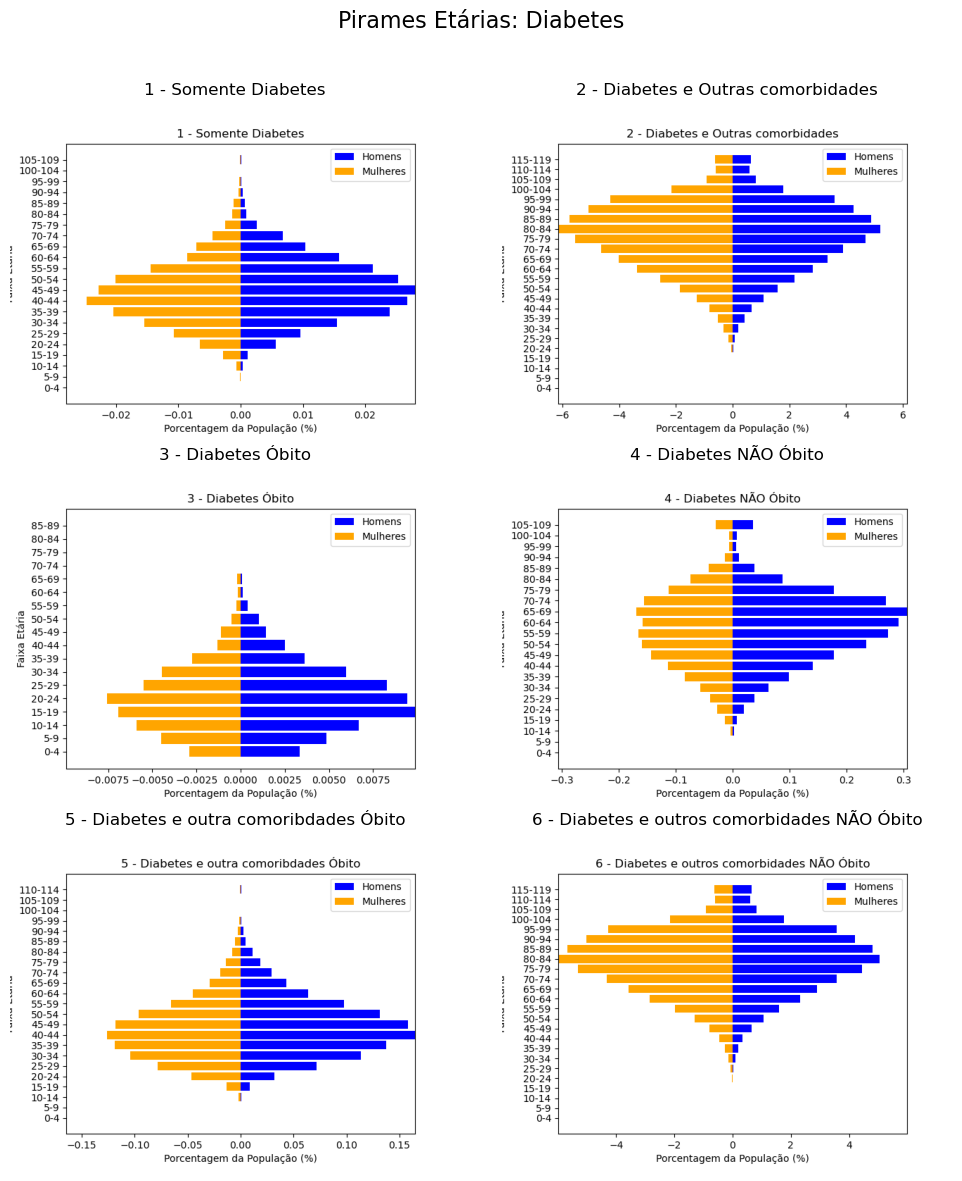

In [17]:
show_multiplot('Diabetes')